In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import preprocessing
import numpy as np
import hdbscan

In [11]:
df = pd.read_csv('conll1_embs.csv', header= None)
df2 = pd.read_csv('conll2_embs.csv', header= None)


In [28]:
kmeans = KMeans(n_clusters= 11, init = 'k-means++', random_state = 1)
kmeans.fit(df)

kmeans2 = KMeans(n_clusters= 11, init = 'k-means++', random_state = 1)
kmeans2.fit(df2)


KMeans(n_clusters=11, random_state=1)

In [16]:
labels = kmeans2.fit_predict(df2)
unique, counts = np.unique(labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0  284]
 [   1  169]
 [   2 1671]
 [   3  189]
 [   4  229]
 [   5  641]
 [   6  533]
 [   7 1110]
 [   8  477]
 [   9  195]
 [  10 1607]
 [  11  673]
 [  12   22]
 [  13  128]
 [  14  361]]


In [29]:
reps = np.concatenate((kmeans.cluster_centers_, kmeans2.cluster_centers_), axis=0)
reps.shape
# pca = PCA(.95)
common_scaler = preprocessing.StandardScaler().fit(reps)

scaled = common_scaler.transform(reps)
# scaled = pca.fit_transform(scaled)
scaled.shape

(22, 1524)

In [32]:
clusterer = KMeans(n_clusters=3, init = 'k-means++', random_state = 1)
labels = clusterer.fit_predict(scaled)
unique, counts = np.unique(labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 0 12]
 [ 1  6]
 [ 2  4]]


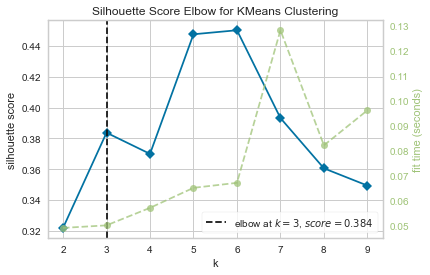

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [30]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

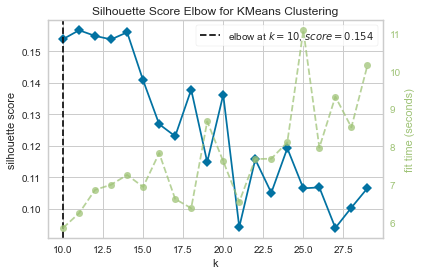

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [27]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state = 1)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(10,30),metric='silhouette', timings= True)
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


In [78]:
# hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cl = KMeans(n_clusters= 5, init = 'k-means++', random_state = 1).fit(scaled)
y_reps = cl.predict(scaled)
unique, counts = np.unique(y_reps, return_counts=True)

print(np.asarray((unique, counts)).T)

[[ 0  5]
 [ 1 17]
 [ 2  8]
 [ 3  9]
 [ 4  1]]


In [33]:
import pickle

pickle.dump(clusterer, open('conll_kmeans_cl_model.sav', 'wb'))

pickle.dump(common_scaler, open('conll_scaler.sav', 'wb'))

# # load the model from disk
# loaded_model = pickle.load(open('hierarch_cl_model.sav', 'rb'))

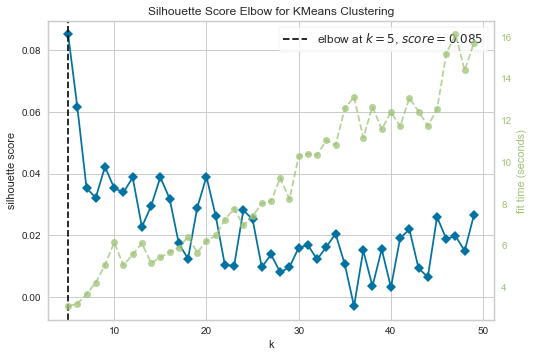

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [10]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(5,50),metric='silhouette', timings= True)
visualizer.fit(df_scaled1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure